In [ ]:

!apt-get install tesseract-ocr
#Tesseract OCR (Optical Character Recognition) tool.
# Tesseract is an open-source OCR engine that is capable of recognizing and extracting text from images.

!apt-get install libtesseract-dev
#This code installs the development files for the Tesseract OCR library.
#These files are required to compile and build applications that use Tesseract.

!pip install pytesseract
#This code installs the pytesseract package.
#pytesseract is a Python wrapper for Tesseract OCR, which provides an easy-to-use interface to interact with the Tesseract OCR engine from Python code.


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 15 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 0s (13.3 MB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123105 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-eng_1%3a

In [ ]:
import pytesseract
#library is used for optical character recognition (OCR).
#It provides an interface to the Tesseract OCR engine, allowing you to extract text from images.

from google.colab import files
#library is specific to Google Colab and provides functionality for working with files.
#It allows you to upload and download files within the Colab environment.

import cv2
#OpenCV library, which is widely used for computer vision tasks.
#It provides various functions for image processing, manipulation, and analysis.

from PIL import Image, ImageFilter, ImageEnhance
#Python Imaging Library, which provides image processing capabilities.
# It allows you to open, manipulate, and save images in various formats.

import io
import numpy as np

In [ ]:
# Accept image from the user
uploaded = files.upload()

Saving 15_img_.png to 15_img_.png


In [ ]:
# Get the file name and content of the uploaded image
image_name = list(uploaded.keys())[0]
image_content = uploaded[image_name]
#hese lines of code retrieve the file name and content of an uploaded image,
# assuming that the image has been uploaded and stored in the uploaded dictionary.

# Load the image from the content
image = Image.open(io.BytesIO(image_content))


# Display some information about the image
print("Image format:", image.format)
print("Image size:", image.size)
print("Image mode:", image.mode)


Image format: PNG
Image size: (800, 521)
Image mode: RGB


In [ ]:
image.save("image.png")

IQA


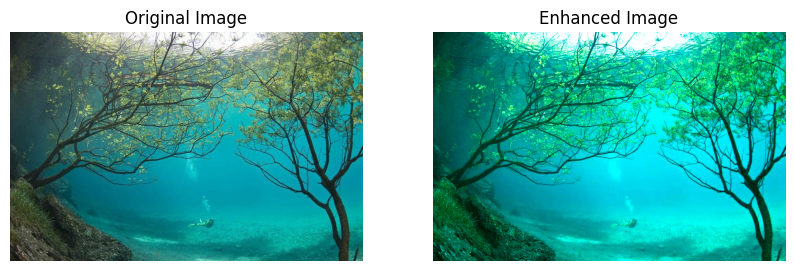

SSIM Score: 0.9559477863955386


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

def color_balance(img, percent=1):
    out_channels = []
    for channel in cv2.split(img):
        hist = cv2.calcHist([channel], [0], None, [256], [0, 256])
        low_limit, high_limit = np.percentile(hist, percent), np.percentile(hist, 100 - percent)
        channel = np.clip(channel, low_limit, high_limit)
        cv2.normalize(channel, channel, 0, 255, cv2.NORM_MINMAX)
        out_channels.append(channel.astype(np.uint8))
    return cv2.merge(out_channels)

def contrast_stretching(img):
    min_val = np.percentile(img, 5)
    max_val = np.percentile(img, 95)
    img = np.clip(img, min_val, max_val)
    img = ((img - min_val) / (max_val - min_val) * 255).astype(np.uint8)
    return img

def underwater_image_enhancement(img_path):
    # Load the underwater image
    img = cv2.imread("image.png")

    # Color balance to reduce color cast
    balanced_img = color_balance(img)

    # Contrast stretching for intensity enhancement
    contrast_stretched_img = contrast_stretching(balanced_img)

    return contrast_stretched_img

def evaluate_ssim(original_img, enhanced_img):
    # Convert images to grayscale
    original_gray = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
    enhanced_gray = cv2.cvtColor(enhanced_img, cv2.COLOR_BGR2GRAY)

    # Calculate SSIM score
    ssim_score, _ = ssim(original_gray, enhanced_gray, full=True)

    return ssim_score

if __name__ == "__main__":
    # Replace 'path_to_original.jpg' and 'path_to_enhanced.jpg'
    # with the actual paths to your original and enhanced underwater images.
    original_image_path = 'image.png'
    enhanced_image_path = 'path_to_enhanced.jpg'

    # Load the original and enhanced images
    original_image = cv2.imread(original_image_path)
    enhanced_image = underwater_image_enhancement(enhanced_image_path)

    # Display the original and enhanced images using matplotlib
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
    plt.title("Enhanced Image")
    plt.axis("off")

    plt.show()

    # Evaluate the SSIM score
    ssim_score = evaluate_ssim(original_image, enhanced_image)
    print(f"SSIM Score: {ssim_score}")

The SSIM score of 0.9559477863955386 indicates a high similarity between the original and enhanced images. The SSIM ranges from -1 to 1, with 1 representing perfect similarity between the images. A score closer to 1 indicates a better enhancement result, suggesting that the enhancement process preserved the structural information and improved the image quality.